# Group 10 Project Proposal
#### Authors: Authors: Waris Bhatia, Lucy Liu, Yolanda Wu, Caroline Zhang

In [1]:
library(tidyverse)
library(infer)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Preliminary Results

First, let's read the heart disease dataset into R and have a glimpse of our data.

In [2]:
# Read the dataset into R
heart <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

# Rename the column names
colnames(heart) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

head(heart)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


Our dataset looks almost tidy and clean. The only thing we will do is to:  
- filter out the NA values  
- convert the `ca` and `thal` columns into numeric first and remove decimals
- convert the categorical variables including `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, `num` from numeric to character

In [13]:
heart <- heart %>% 
    drop_na() %>%
    mutate_at(c("ca", "thal"), as.numeric) %>%
    mutate_at(c(2, 3, 6, 7, 9, 11:14), as.character)

head(heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,3


Now we have a clean and tidy dataframe and we are ready to plot the revevant raw data.

Since we would like to investigate whether the average cholesterol level differ in gender, only two variables will be used in our further analysis, which are `chol` (serum cholesterol in mg/dl) and `sex` (1 = male, 0 = female). Let's select these two columns out.  

In [15]:
chol_sex <- heart %>%
    select(sex, chol)
head(chol_sex)

sex,chol
<chr>,<dbl>
1,286
1,229
1,250
0,204
1,236
0,268


We choose histogram to plot the cholesterol level so that we can have a clear view of the distribution between female and male. 

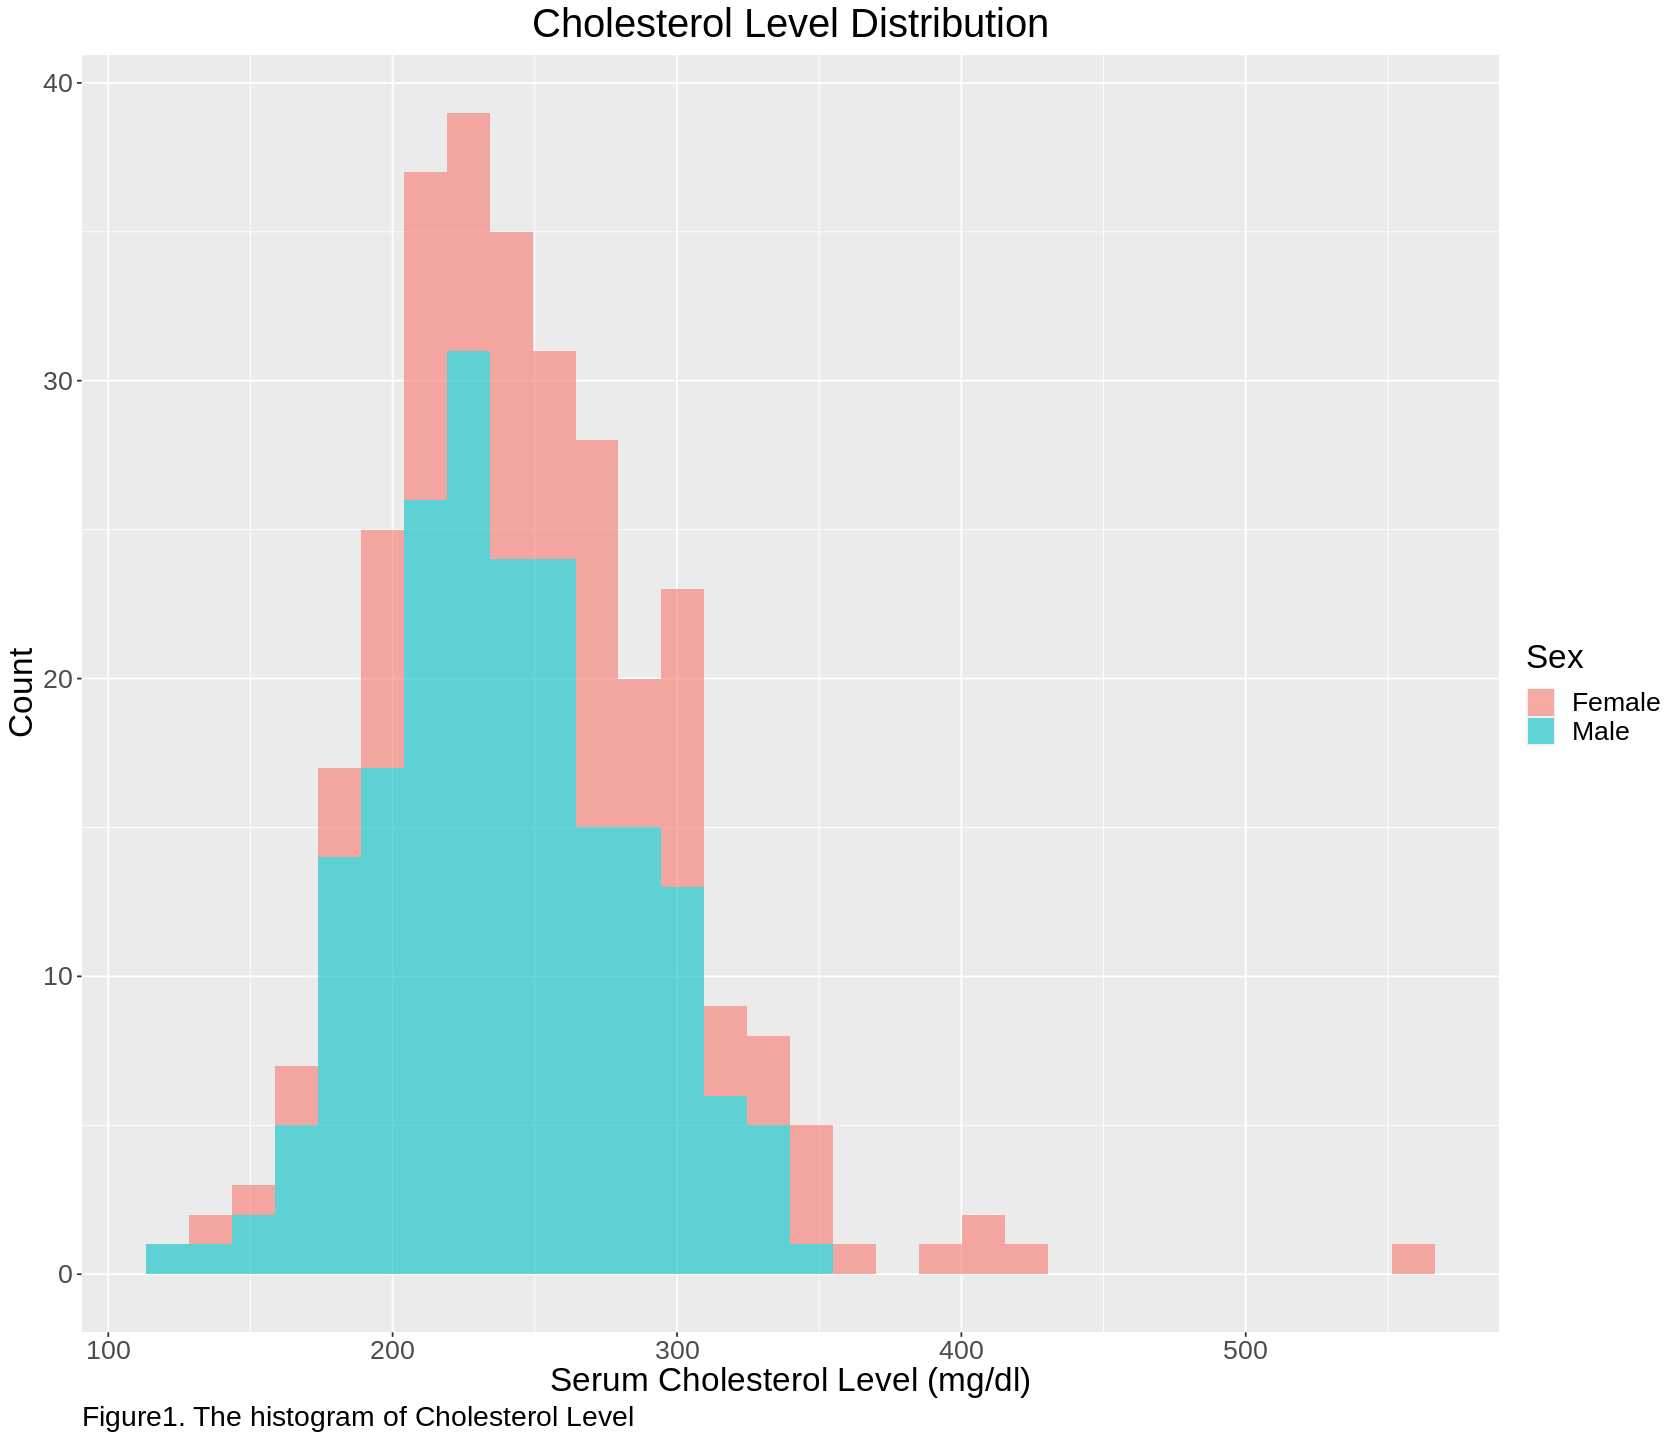

In [30]:
options(repr.plot.width = 14, repr.plot.height = 12)
chol_hist <- chol_sex %>%
    ggplot(aes(x = chol, fill = sex)) +
    geom_histogram(bins=30, alpha = 0.6) +
    labs(x = "Serum Cholesterol Level (mg/dl)", 
         y = "Count", 
         fill = "Sex", 
         title = "Cholesterol Level Distribution", 
         caption = "Figure1. The histogram of Cholesterol Level") +
    theme(text = element_text(size = 20), 
          plot.caption = element_text(size = 17, hjust = 0), 
          plot.title = element_text(hjust = 0.5)) +
    scale_fill_discrete(labels = c("Female", "Male"))

chol_hist